Deep Learning

LAB-1

Pranshu Parate

202211063

50_STARTUPS

In [66]:
#import the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import copy
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from past.builtins import xrange
from matplotlib import gridspec
import matplotlib.cm as cm
from sklearn.metrics import r2_score

In [67]:
#load the dataset
import pandas as pd
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
#shape of dataset i.e rows and columns
df.shape

(50, 5)

In [69]:
#name of columns in the dataset 
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [70]:
#define input features and the target variable.
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [71]:
#conversion of text data into numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [72]:
#scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [73]:
X

array([[-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [-7.17740563e-01, -6.85994341e-01,  1.393

In [74]:
print(X.shape)
print(Y.shape)

(50, 6)
(50,)


In [75]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [76]:
#splitting of train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2,random_state=42)

Multiple Linear Regression from scratch

In [77]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    AllWeights= np.zeros((epochs, x.shape[1]))
    for epoch in range(epochs):
        AllWeights[epoch]=w.T 
        z = x.dot(w) + b
        loss = z - y
        all_weights = []
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
      
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
        all_weights.append(w)
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
            
            
        
    return w, b, cost_list,AllWeights

def predict(X, w, b):
    return X.dot(w) + b   

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2     

In [78]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(40, 6)
(10, 6)
(40,)
(10,)


In [79]:
w, b, c,all_weights= GradientDescent(xtrain, ytrain, np.zeros(xtrain.shape[1]), 0, 0.001,epochs=10000)
levels = np.array([80,150,300,600,2000]) 
W0 = [ x[0] for x in all_weights]
W1 = [ x[1] for x in all_weights]
print(len(c))

Cost is: 7529145840.011841
Cost is: 873392875.2548604
Cost is: 191911678.2893352
Cost is: 87650616.97007975
Cost is: 64293051.583804086
Cost is: 55246219.35476742
Cost is: 50114852.942643836
Cost is: 46785451.29884992
Cost is: 44550126.338205606
Cost is: 43037439.43229895
10000


In [80]:
y_pred = predict(xtest, w, b)
r2score(y_pred, ytest)

0.8822644379707256

Sklearn's Multiple Linear Regression



In [81]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
y_prediction =  LR.predict(xtest)
y_prediction
score=r2_score(ytest,y_prediction)
print(score)

0.8987266414319841


Multiple Linear Regression from scratch and from Sklearn gives same accuracy.

In [82]:
def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;
w0 = np.linspace(-w[0]*4, w[0]*4, 100)
w1 = np.linspace(-w[1]*4, w[1]*4, 100)

mse_vals = np.zeros(shape=(w0.size, w1.size))
for i, value1 in enumerate(w0):
  for j, value2 in enumerate(w1):
    w_temp = np.array((value1, value2,w[2],w[3],w[4],w[5]))
    mse_vals[i,j] = costfunction(xtrain,ytrain,w_temp)
    

Contour Plot

In [83]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=w0, y=w1, z=mse_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=500, height=500, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

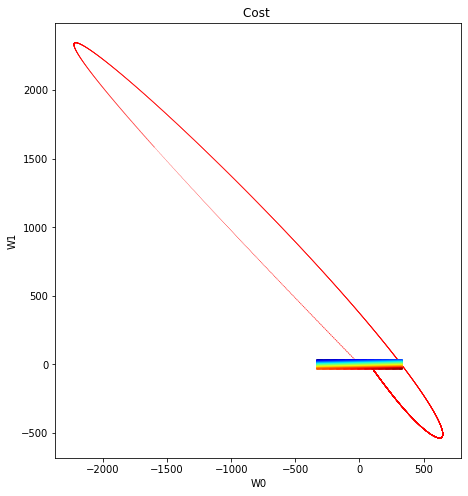

In [84]:
T0, T1 = np.meshgrid(w0,w1)
anglesx = np.array(W0)[1:] - np.array(W0)[:-1]
anglesy = np.array(W1)[1:] - np.array(W1)[:-1]
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, mse_vals, 70, cmap = 'jet')
ax.quiver(W0[:-1], W1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.title("Cost ")
plt.xlabel("W0")
plt.ylabel("W1")
plt.show()

Text(0, 0.5, 'cost')

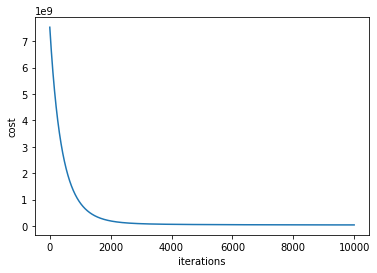

In [85]:
plt.plot(c)
plt.xlabel('iterations')
plt.ylabel('cost')

USER_DATA

In [86]:
#load the dataset
import pandas as pd
df1 = pd.read_csv('/content/User_Data.csv')
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
#shape of dataset i.e rows and columns
df1.shape

(400, 5)

In [88]:
#name of columns in the dataset 
df1.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [89]:
y_user = df1.iloc[:,-1].values
user = df1.drop(["User ID"],axis = 1)
one_hot_encoded_data = pd.get_dummies(user, columns = ['Gender'])

one_hot_encoded_data = one_hot_encoded_data.drop(["Purchased"],axis = 1)
print(one_hot_encoded_data)

     Age  EstimatedSalary  Gender_Female  Gender_Male
0     19            19000              0            1
1     35            20000              0            1
2     26            43000              1            0
3     27            57000              1            0
4     19            76000              0            1
..   ...              ...            ...          ...
395   46            41000              1            0
396   51            23000              0            1
397   50            20000              1            0
398   36            33000              0            1
399   49            36000              1            0

[400 rows x 4 columns]


In [90]:
x_user = one_hot_encoded_data.iloc[:].values
x_user.shape
x_user = sc.fit_transform(x_user)

In [91]:
#splitting of train and test set
from sklearn.model_selection import train_test_split
Xtrain_U, Xtest_U, Ytrain_U, Ytest_U = train_test_split( x_user, y_user, test_size = 0.3,random_state=42)

Logistic Regression from scratch

In [92]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))
 
def fit(X, y,lr,epochs):
        n_samples, n_features = X.shape

        # init parameters
        AllWeights =  np.zeros((epochs, X.shape[1])) 
        weights = np.zeros(n_features)
        bias = 0

        # gradient descent
        for i in range(epochs):
            AllWeights[i]=weights.T 
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X,weights) + bias
            # apply sigmoid function
            y_predicted = sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            weights -= lr * dw
            bias -= lr * db

        return weights ,bias ,AllWeights 

def predict(X,weights,bias):
        linear_model = np.dot(X,weights) + bias
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)     

In [93]:
w_log,bias, all_weights_log = fit(Xtrain_U,Ytrain_U,0.001,15000)
y_pred = predict(Xtest_U,w_log,bias)
accuracy = accuracy_score(Ytest_U,y_pred)
print(accuracy)

0.8416666666666667


Contour Plot for Logistic Regression

In [94]:
def loss_entropy(x,y,w,b):
    y_hat = sigmoid(np.dot(x, w) + b)
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

w0_log = np.linspace(-w_log[0]*4, w_log[0]*4, 100)
w1_log = np.linspace(-w_log[1]*4, w_log[1]*4, 100)

error = np.zeros(shape=(w0_log.size, w1_log.size))
for i, value1 in enumerate(w0_log):
  for j, value2 in enumerate(w1_log):
    wlog_temp = np.array((value1, value2,w_log[2],w_log[3]))
    error[i,j] = loss_entropy(Xtrain_U,Ytrain_U,wlog_temp,bias)

W0_log = [ x[0] for x in all_weights_log]
W1_log = [ x[1] for x in all_weights_log]    
print(len(W0_log))

15000


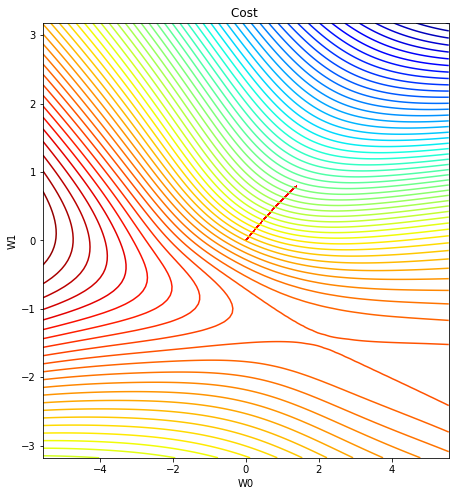

In [95]:
T0, T1 = np.meshgrid(w0_log,w1_log)
anglesx = np.array(W0_log)[1:] - np.array(W0_log)[:-1]
anglesy = np.array(W1_log)[1:] - np.array(W1_log)[:-1]
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, error, 70, cmap = 'jet')
ax.quiver(W0_log[:-1], W1_log[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.title("Cost ")
plt.xlabel("W0")
plt.ylabel("W1")
plt.show()

Logistic Regression from Sklearn

In [96]:
model = LogisticRegression()
model.fit(Xtrain_U,Ytrain_U)
pred2 = model.predict(Xtest_U)
accuracy2 = accuracy_score(Ytest_U,pred2)
print(accuracy2)

0.8583333333333333


Logistic Regression from scratch and from Sklearn gives almost same accuracy.

If the learning rate is very large we will skip the optimal solution. If it is too small we will need too many iterations to converge to the best values. So using a good learning rate is crucial.Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights.If the learning rate is high, the cost function could saturate at a value higher than the minimum value.